<a href="https://colab.research.google.com/github/EganStark/CSE475-Lab-Works/blob/main/LAB01_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Set directory path to the dataset
data_dir = '/content/drive/MyDrive/CSE475 Files/MangoLeafBD Dataset'
categories = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
              "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

# Function to load images and labels
def load_images(data_directory, label_names, image_size=(128, 128)):
    img_data = []
    img_labels = []
    avg_rgb_values = []
    for label_idx, label_name in enumerate(label_names):
        path = os.path.join(data_directory, label_name)
        if not os.path.isdir(path):
            print(f"Directory not found: {path}")
            continue
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, image_size)
                img_data.append(img)
                img_labels.append(label_idx)
                avg_rgb_values.append(cv2.mean(img)[:3])  # BGR average
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(img_data), np.array(img_labels), np.array(avg_rgb_values)

# Load images, labels, and average color information
data_directory = '/content/drive/MyDrive/CSE475 Files/MangoLeafBD Dataset'  # Specify your directory
label_names = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
              "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]  # Specify your categories
images, labels, avg_rgb_values = load_images(data_directory, label_names)


<ipython-input-4-0912e89fabd5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")


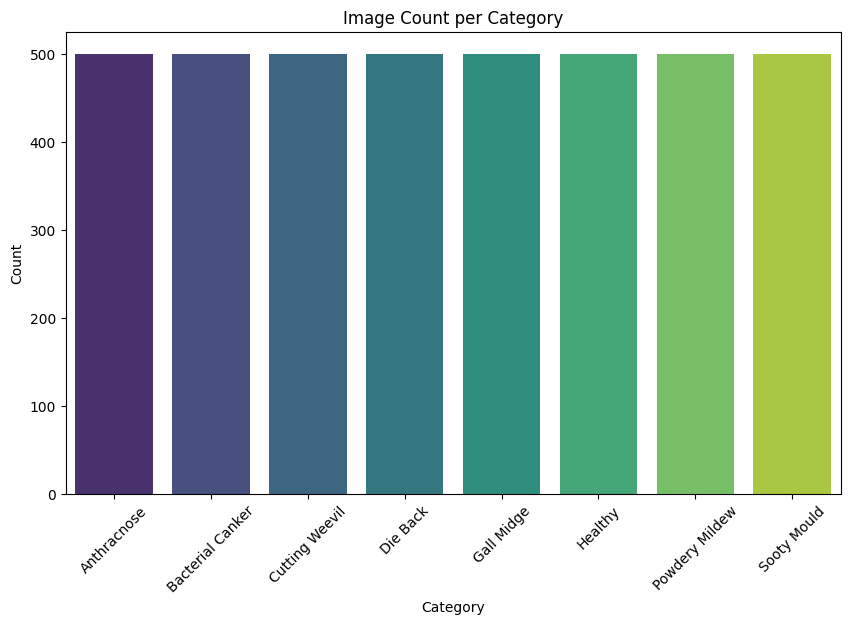

In [4]:
# Step 2: EDA with Visualizations

# 1. Display Category Distribution
label_counts = Counter(labels)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")
plt.xticks(range(len(label_names)), label_names, rotation=45)
plt.title('Image Count per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



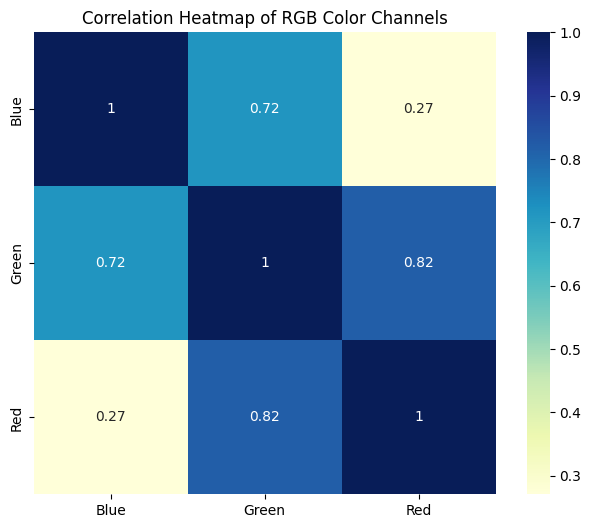

In [5]:
# 2. Average Color Correlation Heatmap
color_df = pd.DataFrame(avg_rgb_values, columns=['Blue', 'Green', 'Red'])
plt.figure(figsize=(8, 6))
sns.heatmap(color_df.corr(), annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Heatmap of RGB Color Channels")
plt.show()



In [6]:
# 3. Average Color Intensity by Category
summary_data = {
    "Category": label_names,
    "Image Count": [label_counts[cat] for cat in range(len(label_names))],
    "Avg Blue": [np.mean(avg_rgb_values[labels == cat, 0]) for cat in range(len(label_names))],
    "Avg Green": [np.mean(avg_rgb_values[labels == cat, 1]) for cat in range(len(label_names))],
    "Avg Red": [np.mean(avg_rgb_values[labels == cat, 2]) for cat in range(len(label_names))]
}
summary_df = pd.DataFrame(summary_data)

# Display the summary table
print("Category Summary Table")
display(summary_df)


Category Summary Table


,Category,Image Count,Avg Blue,Avg Green,Avg Red
0,Anthracnose,500,177.381043,181.291865,175.884111
1,Bacterial Canker,500,161.357619,173.474733,174.161276
2,Cutting Weevil,500,198.101516,176.394646,152.015702
3,Die Back,500,188.665198,171.646450,160.609038
4,Gall Midge,500,171.364578,179.479750,180.386189
5,Healthy,500,173.119382,184.125183,180.827063
6,Powdery Mildew,500,164.235554,168.028189,166.434599
7,Sooty Mould,500,162.735904,175.105250,175.701873


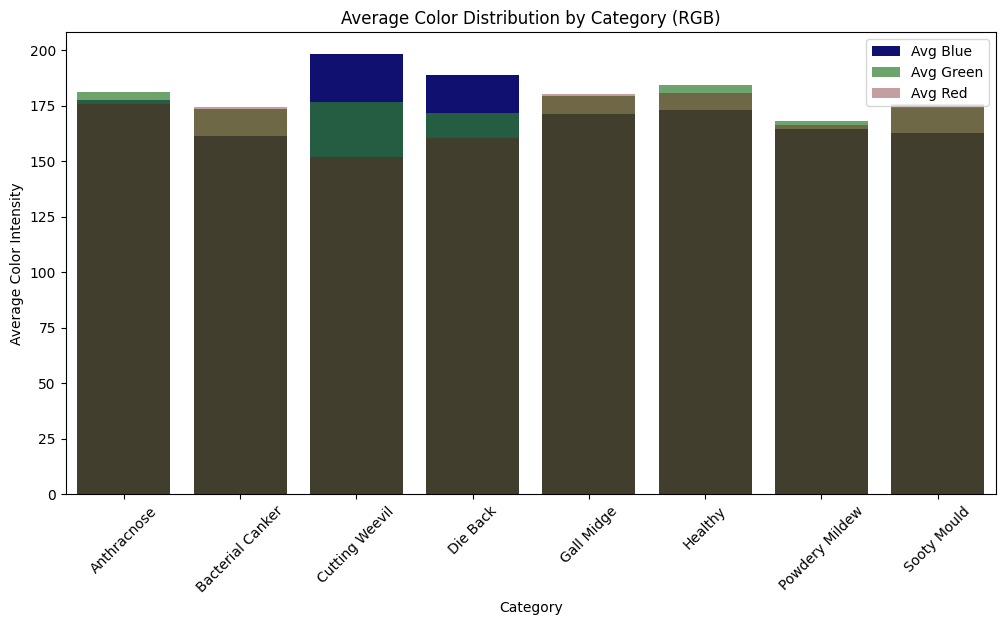

In [7]:
# Visualization of Average Color Intensity by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Avg Blue', data=summary_df, color='navy', label="Avg Blue")
sns.barplot(x='Category', y='Avg Green', data=summary_df, color='forestgreen', label="Avg Green", alpha=0.7)
sns.barplot(x='Category', y='Avg Red', data=summary_df, color='maroon', label="Avg Red", alpha=0.4)
plt.title("Average Color Distribution by Category (RGB)")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Average Color Intensity")
plt.legend()
plt.show()


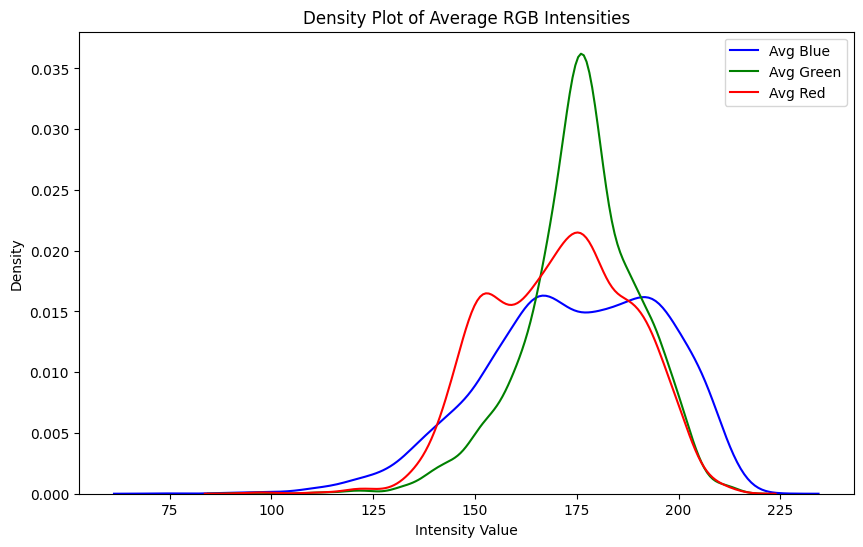

In [8]:
# 4. KDE Plot of Color Intensities for Each Channel
plt.figure(figsize=(10, 6))
for color, channel in zip(['blue', 'green', 'red'], range(3)):
    sns.kdeplot(avg_rgb_values[:, channel], color=color, label=f'Avg {color.capitalize()}')
plt.title("Density Plot of Average RGB Intensities")
plt.xlabel("Intensity Value")
plt.ylabel("Density")
plt.legend()
plt.show()


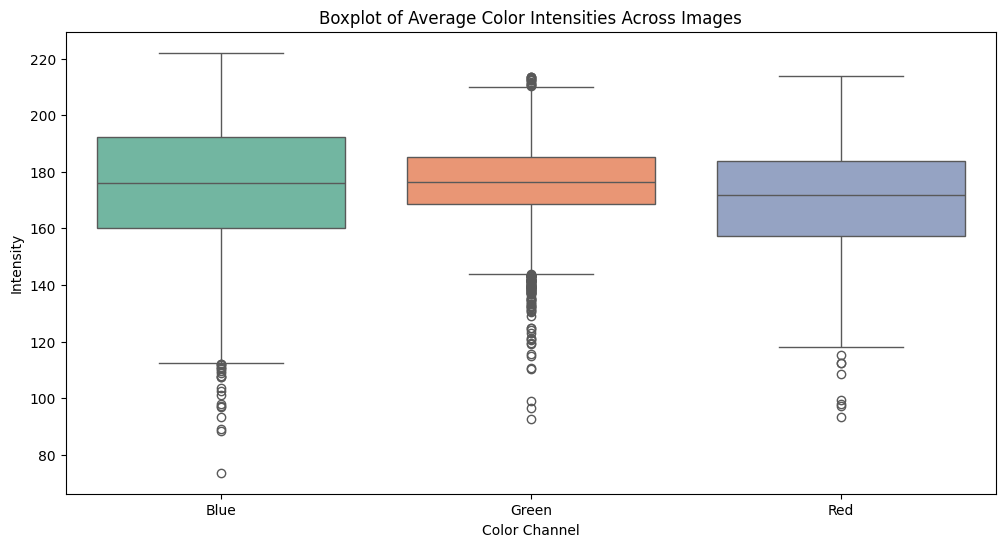

In [9]:
# 5. Boxplot of RGB Intensities by Category
# This helps to understand the spread of color intensities within each category
plt.figure(figsize=(12, 6))
sns.boxplot(data=color_df, palette="Set2")
plt.title("Boxplot of Average Color Intensities Across Images")
plt.xlabel("Color Channel")
plt.ylabel("Intensity")
plt.show()

<ipython-input-10-974e9786b663>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y=color, data=color_df, palette='Spectral')
<ipython-input-10-974e9786b663>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y=color, data=color_df, palette='Spectral')
<ipython-input-10-974e9786b663>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y=color, data=color_df, palette='Spectral')


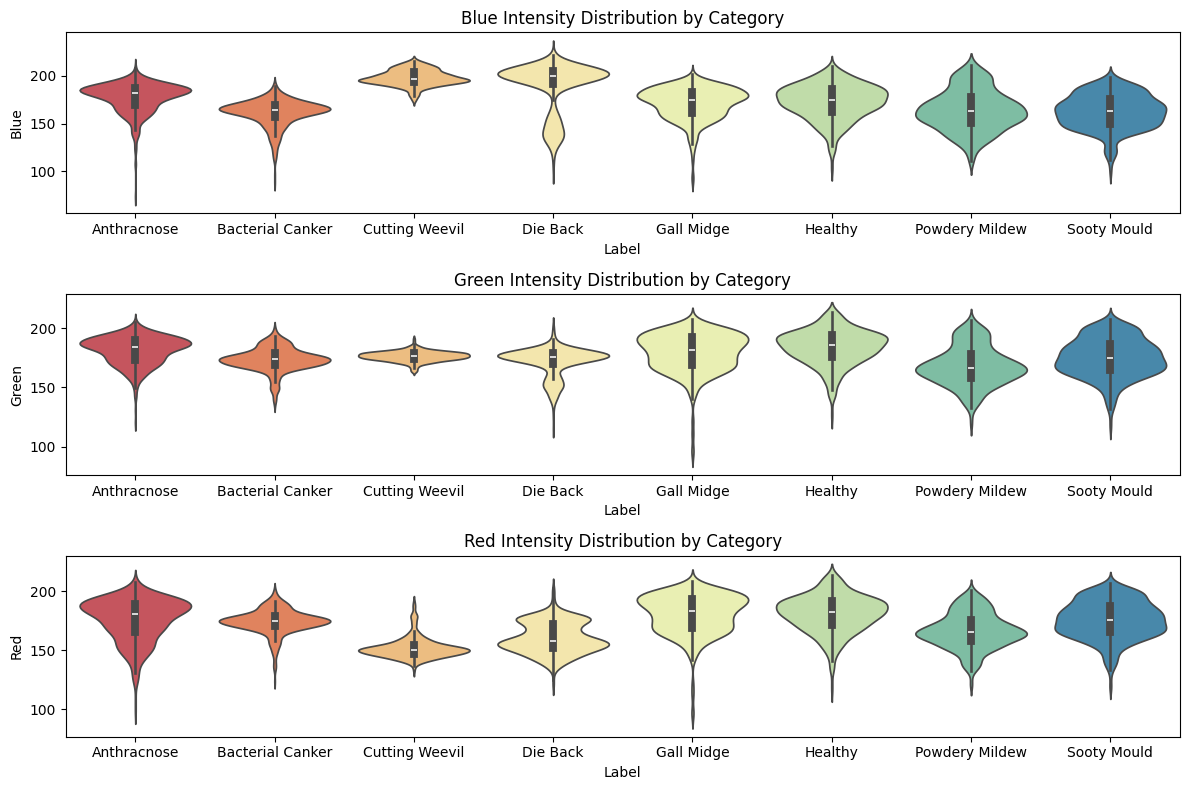

In [10]:
# 6. Violin Plot of RGB Intensities by Category
# Adds insight into the distribution shape for each category
plt.figure(figsize=(12, 8))
color_df['Label'] = labels
for i, color in enumerate(['Blue', 'Green', 'Red']):
    plt.subplot(3, 1, i + 1)
    sns.violinplot(x='Label', y=color, data=color_df, palette='Spectral')
    plt.title(f"{color} Intensity Distribution by Category")
    plt.xticks(range(len(label_names)), label_names)
plt.tight_layout()
plt.show()

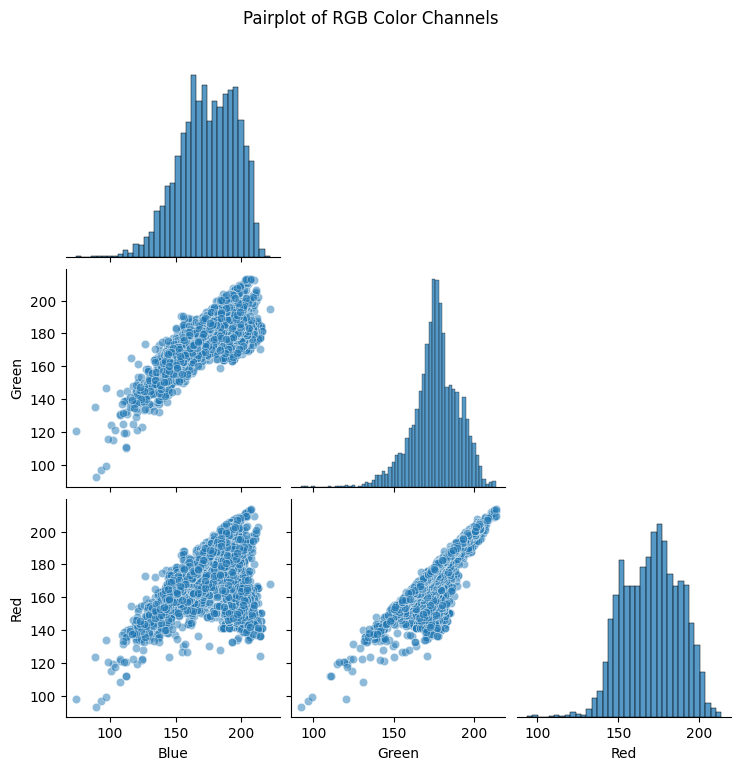

In [11]:
# 7. Pairplot of Color Channels for Visualizing Relationships
sns.pairplot(color_df[['Blue', 'Green', 'Red']], corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of RGB Color Channels", y=1.02)
plt.show()

In [ ]:
#Feature Extraction

In [18]:
def extract_features(images):         #that computes the color histogram for each image in the input list images
    features = []
    for img in images:
        hist = cv2.calcHist([img], [0, 1, 2], None, [6, 6, 6], [0, 256, 0, 256, 0, 256])
        print(hist.shape)

        cv2.normalize(hist, hist)
        features.append(hist.flatten())
    return np.array(features)

X = extract_features(images)
y = labels

(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)
(6, 6, 6)


Decision Tree Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.71      0.62      0.66       167
Bacterial Canker       0.74      0.78      0.76       148
  Cutting Weevil       0.85      0.96      0.90       158
        Die Back       0.83      0.75      0.79       149
      Gall Midge       0.53      0.52      0.52       159
         Healthy       0.58      0.69      0.63       135
  Powdery Mildew       0.62      0.56      0.59       134
     Sooty Mould       0.46      0.47      0.47       150

        accuracy                           0.67      1200
       macro avg       0.67      0.67      0.67      1200
    weighted avg       0.67      0.67      0.67      1200


Random Forest Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.83      0.87      0.85       167
Bacterial Canker       0.87      0.91      0.89       148
  Cutting Weevil       0.96      0.95      0.95    

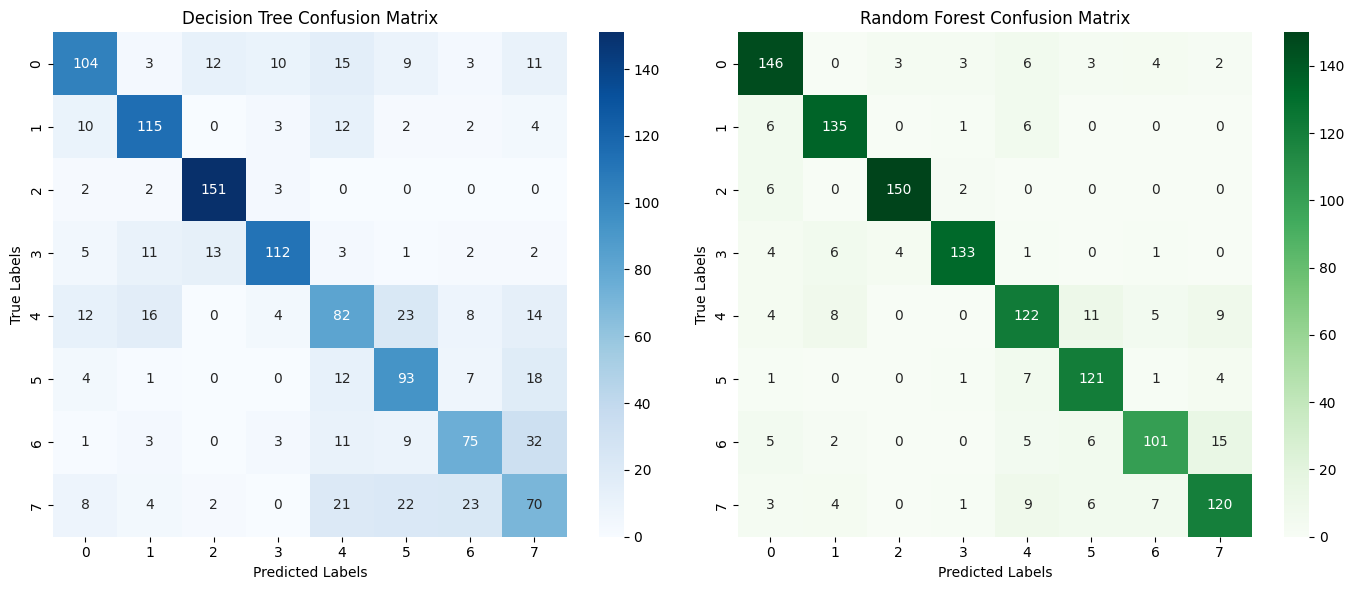

In [19]:
# Step 3: Model Training - Preprocessing and Feature Extraction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `X_train`, `X_test`, `y_train`, and `y_test` are already defined

# Initialize models
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train and predict with Decision Tree
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Train and predict with Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Compute accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=label_names))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_names))

# Print accuracies
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()
